In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student_dropout.csv')
df

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,False
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,False
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,True
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df['Total_Grade'] = df['Grade_1'] + df['Grade_2'] + df['Final_Grade']  

In [6]:
df_drop = df.drop(columns = ['School', 'Family_Size', 'Mother_Education', 'Health_Status', 'Father_Education', 'Extra_Curricular_Activities', 'Attended_Nursery', 'Gender', 'Address', 'In_Relationship', 'Mother_Job', 'Father_Job', 'Grade_1', 'Grade_2', 'Final_Grade', 'Guardian'])
df_drop

,Age,Parental_Status,Reason_for_Choosing_School,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Wants_Higher_Education,Internet_Access,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Number_of_Absences,Dropped_Out,Total_Grade
0,18,A,course,2,2,0,yes,no,no,yes,no,4,3,4,1,1,4,False,22
1,17,T,course,1,2,0,no,yes,no,yes,yes,5,3,3,1,1,2,False,31
2,15,T,other,1,2,0,yes,no,no,yes,yes,4,3,2,2,3,6,False,37
3,15,T,home,1,3,0,no,yes,no,yes,yes,3,2,2,1,1,0,False,42
4,16,T,home,1,2,0,no,yes,no,yes,no,4,3,2,1,2,0,False,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,T,course,1,3,1,no,no,no,yes,yes,5,4,2,1,2,4,False,31
645,18,T,course,1,2,0,no,yes,no,yes,yes,4,3,4,1,1,4,False,46
646,18,T,course,2,2,0,no,no,no,yes,no,1,1,1,1,1,6,True,32
647,17,T,course,2,1,0,no,no,no,yes,yes,2,4,5,3,4,6,False,30


In [7]:
df_drop['Family_Support'] = df_drop['Family_Support'].replace({'no':0, 'yes': 1})
df_drop['Extra_Paid_Class'] = df_drop['Extra_Paid_Class'].replace({'no':0, 'yes': 1})
df_drop['School_Support'] = df_drop['School_Support'].replace({'no':0, 'yes': 1})
df_drop['Internet_Access'] = df_drop['Internet_Access'].replace({'no':0, 'yes': 1})
df_drop['Wants_Higher_Education'] = df_drop['Wants_Higher_Education'].replace({'no':0, 'yes': 1})
df_drop['Dropped_Out'] = df_drop['Dropped_Out'].replace({False: 0, True: 1})

df_drop

,Age,Parental_Status,Reason_for_Choosing_School,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Wants_Higher_Education,Internet_Access,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Number_of_Absences,Dropped_Out,Total_Grade
0,18,A,course,2,2,0,1,0,0,1,0,4,3,4,1,1,4,0,22
1,17,T,course,1,2,0,0,1,0,1,1,5,3,3,1,1,2,0,31
2,15,T,other,1,2,0,1,0,0,1,1,4,3,2,2,3,6,0,37
3,15,T,home,1,3,0,0,1,0,1,1,3,2,2,1,1,0,0,42
4,16,T,home,1,2,0,0,1,0,1,0,4,3,2,1,2,0,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,T,course,1,3,1,0,0,0,1,1,5,4,2,1,2,4,0,31
645,18,T,course,1,2,0,0,1,0,1,1,4,3,4,1,1,4,0,46
646,18,T,course,2,2,0,0,0,0,1,0,1,1,1,1,1,6,1,32
647,17,T,course,2,1,0,0,0,0,1,1,2,4,5,3,4,6,0,30


In [8]:
data_for_corr = df_drop.drop(columns = ['Parental_Status', 'Reason_for_Choosing_School'])
data_for_corr

,Age,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Wants_Higher_Education,Internet_Access,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Number_of_Absences,Dropped_Out,Total_Grade
0,18,2,2,0,1,0,0,1,0,4,3,4,1,1,4,0,22
1,17,1,2,0,0,1,0,1,1,5,3,3,1,1,2,0,31
2,15,1,2,0,1,0,0,1,1,4,3,2,2,3,6,0,37
3,15,1,3,0,0,1,0,1,1,3,2,2,1,1,0,0,42
4,16,1,2,0,0,1,0,1,0,4,3,2,1,2,0,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,1,3,1,0,0,0,1,1,5,4,2,1,2,4,0,31
645,18,1,2,0,0,1,0,1,1,4,3,4,1,1,4,0,46
646,18,2,2,0,0,0,0,1,0,1,1,1,1,1,6,1,32
647,17,2,1,0,0,0,0,1,1,2,4,5,3,4,6,0,30


In [9]:
Correlation_Matrix = data_for_corr.corr()
Correlation_Matrix

,Age,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Wants_Higher_Education,Internet_Access,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Number_of_Absences,Dropped_Out,Total_Grade
Age,1.000000,0.034490,-0.008415,0.319968,-0.167841,-0.101894,-0.005458,-0.265497,0.013115,-0.020559,-0.004910,0.112805,0.134768,0.086357,0.149998,0.110722,-0.133499
Travel_Time,0.034490,1.000000,-0.063154,0.097730,-0.044807,-0.039289,-0.044842,-0.071958,-0.190826,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.008149,0.057869,-0.151066
Study_Time,-0.008415,-0.063154,1.000000,-0.147441,0.089316,0.143509,-0.002314,0.188256,0.037529,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.118389,-0.165111,0.261630
Number_of_Failures,0.319968,0.097730,-0.147441,1.000000,-0.000745,-0.006982,0.069416,-0.309400,-0.095330,-0.062645,0.108995,0.045078,0.105949,0.082266,0.122779,0.380237,-0.405815
School_Support,-0.167841,-0.044807,0.089316,-0.000745,1.000000,0.075402,0.040512,0.085355,-0.025942,-0.012038,-0.015611,-0.058124,-0.028076,-0.098275,-0.059503,-0.034527,-0.067830
Family_Support,-0.101894,-0.039289,0.143509,-0.006982,0.075402,1.000000,0.094297,0.085340,0.071891,0.015228,0.003764,0.017262,-0.016844,-0.065605,0.041980,-0.037903,0.047932
Extra_Paid_Class,-0.005458,-0.044842,-0.002314,0.069416,0.040512,0.094297,1.000000,0.024112,0.031823,0.031937,-0.049574,-0.006683,0.051986,0.035682,-0.035959,0.053708,-0.052771
Wants_Higher_Education,-0.265497,-0.071958,0.188256,-0.309400,0.085355,0.085340,0.024112,1.000000,0.070345,0.048239,-0.102618,-0.069105,-0.131663,-0.084327,-0.129891,-0.309708,0.352762
Internet_Access,0.013115,-0.190826,0.037529,-0.095330,-0.025942,0.071891,0.031823,0.070345,1.000000,0.082214,0.063268,0.092869,0.042811,0.060651,0.067301,-0.088215,0.152914
Family_Relationship,-0.020559,-0.009521,-0.004127,-0.062645,-0.012038,0.015228,0.031937,0.048239,0.082214,1.000000,0.129216,0.089707,-0.075767,-0.093511,-0.089534,-0.044987,0.070550


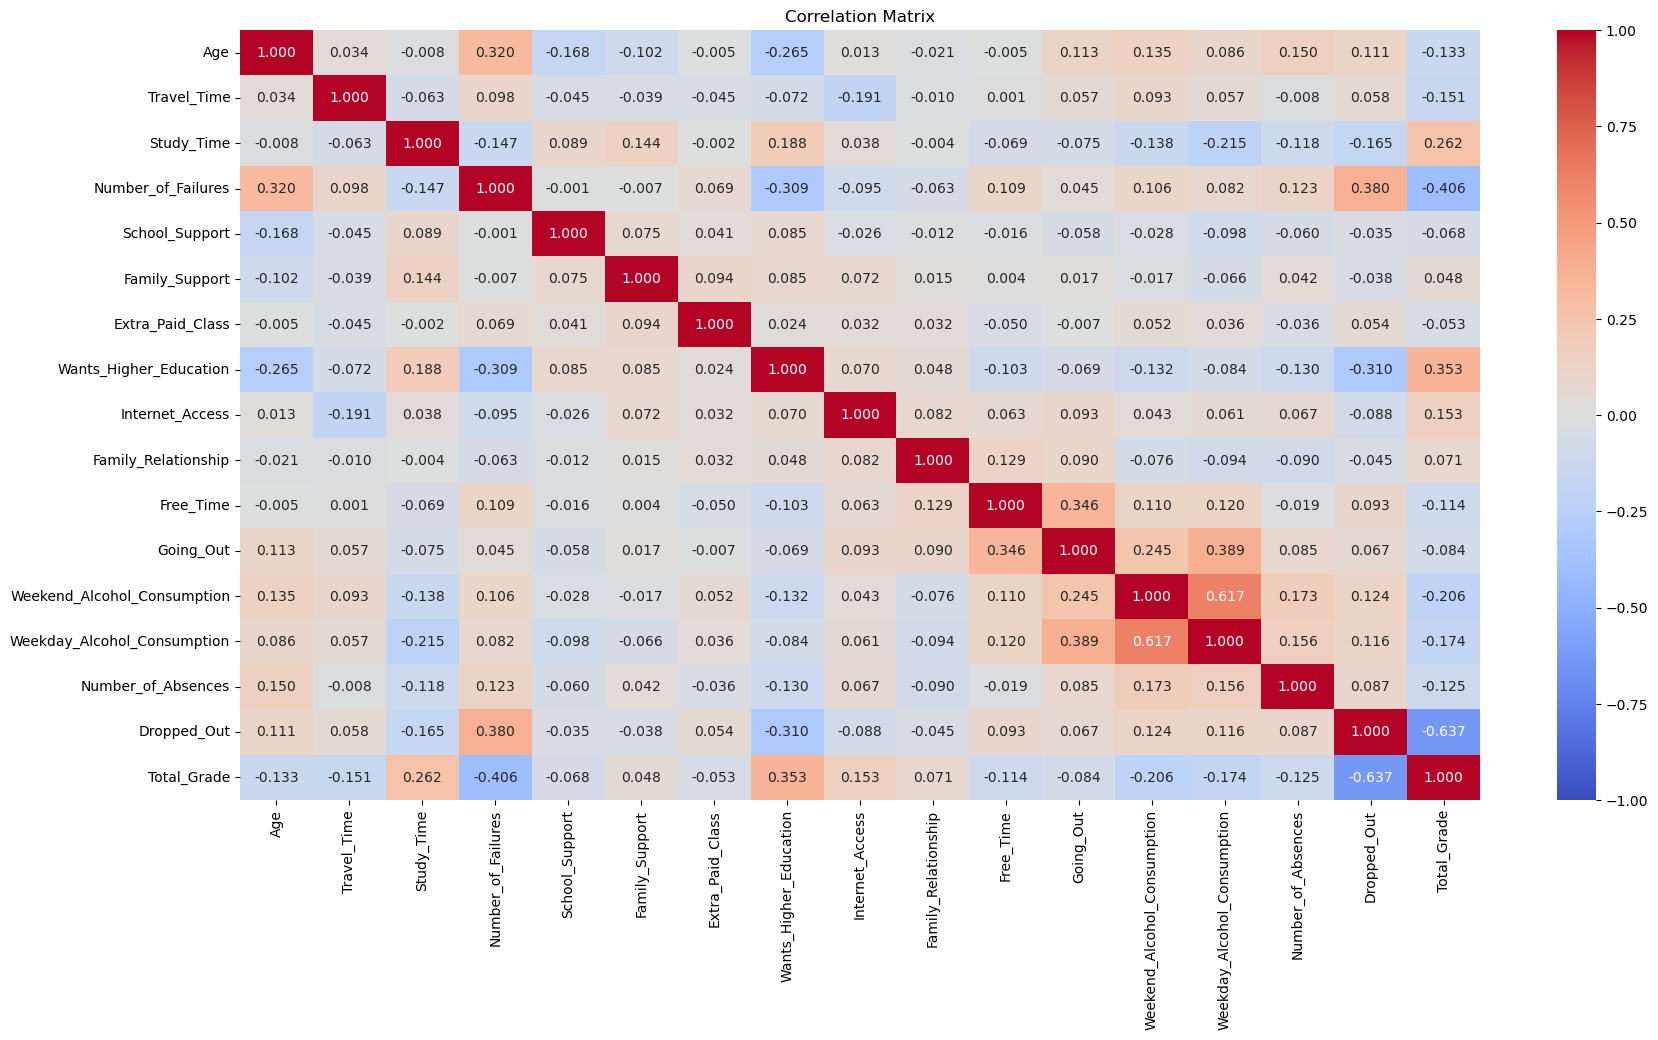

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(Correlation_Matrix, vmax = 1, vmin = -1, center = 0, fmt = '0.3f', annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
drop_out_corr = Correlation_Matrix['Dropped_Out'].drop('Dropped_Out').sort_values(ascending = False)

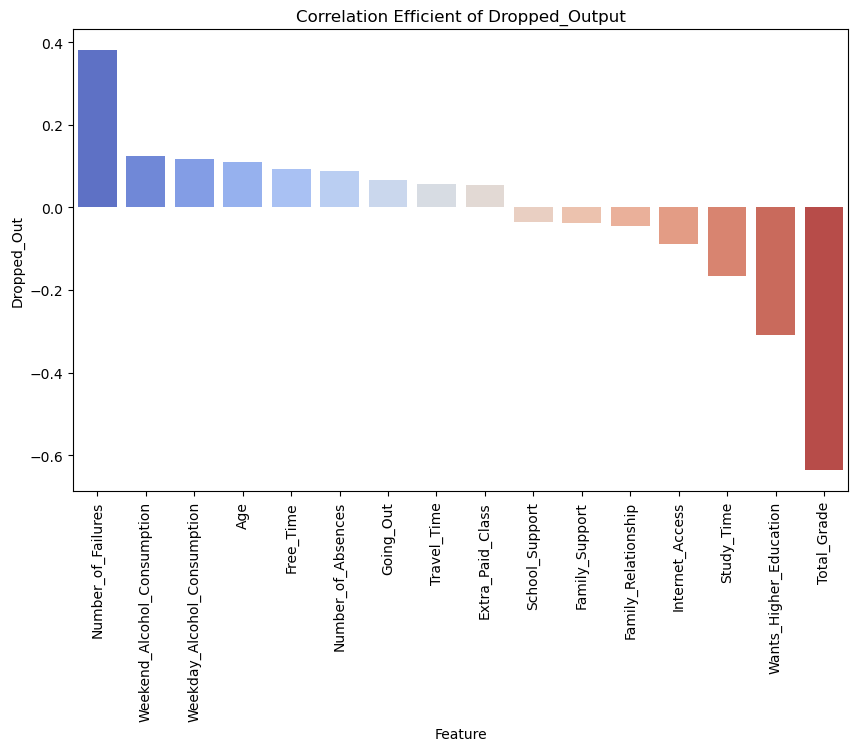

In [12]:
plt.figure(figsize = (10,6))
sns.barplot(data = drop_out_corr.reset_index(), x = 'index', y = 'Dropped_Out', hue = 'index', palette = 'coolwarm', legend = False)
plt.xlabel('Feature')
plt.ylabel('Dropped_Out')
plt.title('Correlation Efficient of Dropped_Output')
plt.xticks(rotation = 90)
plt.show()

In [13]:
df_drop.groupby('Reason_for_Choosing_School').agg({'Dropped_Out': 'mean'})

,Dropped_Out
Reason_for_Choosing_School,
course,0.192982
home,0.114094
other,0.250000
reputation,0.069930


C:\Users\ssowl\AppData\Local\Temp\ipykernel_30088\1599193766.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df_drop, x = 'Reason_for_Choosing_School', y = 'Dropped_Out', hue = 'Reason_for_Choosing_School', ci = None)


<Axes: xlabel='Reason_for_Choosing_School', ylabel='Dropped_Out'>

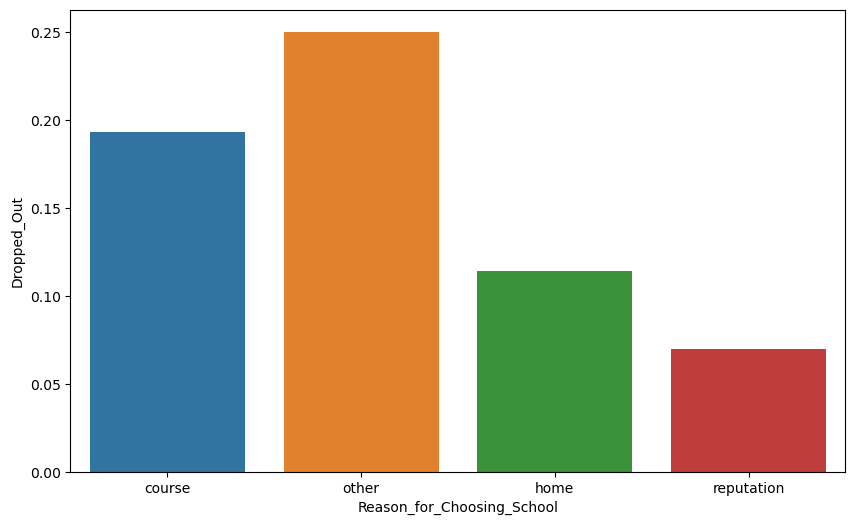

In [14]:
plt.figure(figsize = (10,6))
sns.barplot(data = df_drop, x = 'Reason_for_Choosing_School', y = 'Dropped_Out', hue = 'Reason_for_Choosing_School', ci = None)

C:\Users\ssowl\AppData\Local\Temp\ipykernel_30088\1561200996.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = df_drop, x = 'Number_of_Failures', y = 'Dropped_Out', hue = 'Reason_for_Choosing_School', ci = None)


<Axes: xlabel='Number_of_Failures', ylabel='Dropped_Out'>

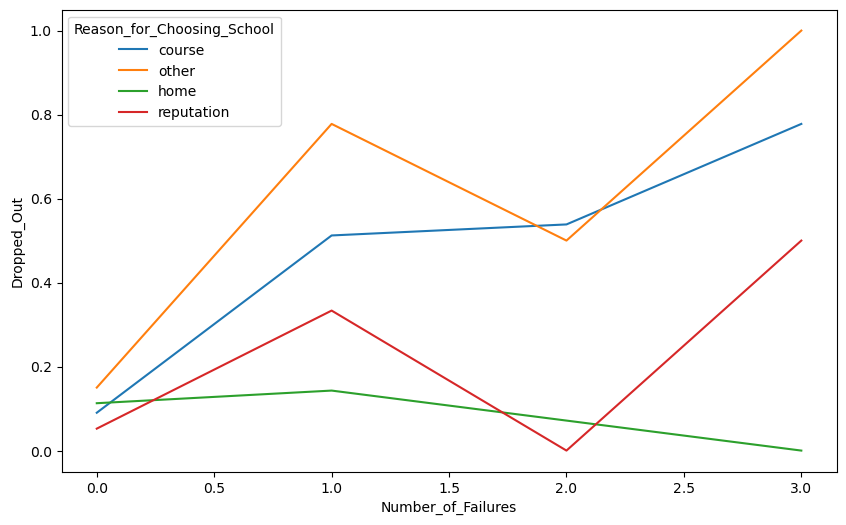

In [15]:
plt.figure(figsize = (10,6))
sns.lineplot(data = df_drop, x = 'Number_of_Failures', y = 'Dropped_Out', hue = 'Reason_for_Choosing_School', ci = None)

In [16]:
grade_dropout = df_drop.groupby('Total_Grade').agg({'Dropped_Out': 'sum'}).reset_index()
grade_dropout

,Total_Grade,Dropped_Out
0,4,1
1,5,2
2,7,2
3,8,1
4,9,1
5,12,1
6,13,1
7,14,3
8,15,1
9,16,1


C:\Users\ssowl\AppData\Local\Temp\ipykernel_30088\2812580394.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = grade_dropout, x = 'Total_Grade', y = 'Dropped_Out', hue = 'Total_Grade', ci = None)


<Axes: xlabel='Total_Grade', ylabel='Dropped_Out'>

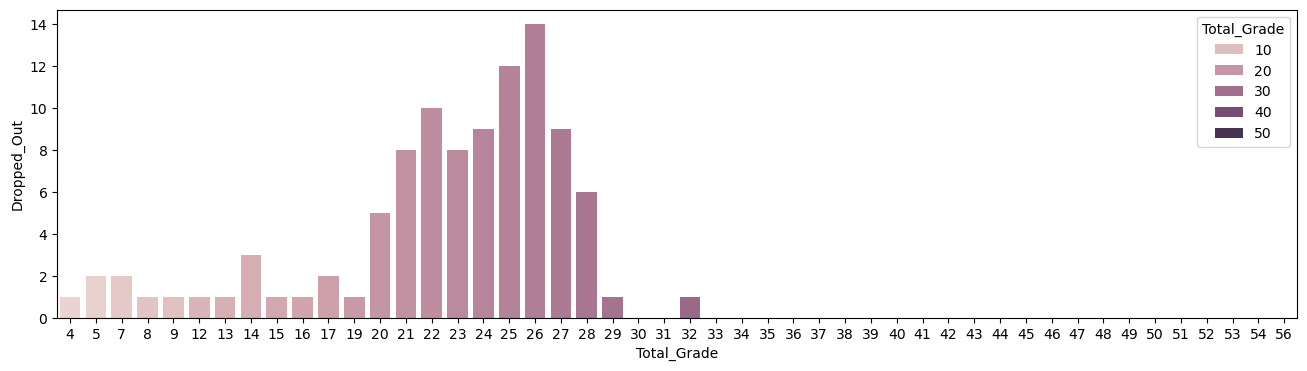

In [17]:
plt.figure(figsize = (16,4))
sns.barplot(data = grade_dropout, x = 'Total_Grade', y = 'Dropped_Out', hue = 'Total_Grade', ci = None)

**XGBoost 모델

In [18]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [19]:
X = data_for_corr.drop(columns = 'Dropped_Out')
y = data_for_corr['Dropped_Out']

In [20]:
data_for_corr['Dropped_Out'].value_counts()

Dropped_Out
0    549
1    100
Name: count, dtype: int64

In [21]:
smote = SMOTE(random_state = 0)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [23]:
X_train_over.shape

(884, 16)

In [24]:
y_train_over.shape

(884,)

In [25]:
#DMatrix
dtrain = xgb.DMatrix(data = X_train_over, label = y_train_over)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [26]:
params = {'max_depth':3,
          'eta':0.1, #XGBClassifier를 사용하는 경우 learning_rate
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100           
}

num_rounds = 400

#train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist =[(dtrain, 'train'), (dtest, 'eval')]

In [27]:
#하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds, early_stopping_rounds = 100, evals = wlist)

[0]	train-logloss:0.60776	eval-logloss:0.60861
[1]	train-logloss:0.53781	eval-logloss:0.53939
[2]	train-logloss:0.47936	eval-logloss:0.48264
[3]	train-logloss:0.42988	eval-logloss:0.43402
[4]	train-logloss:0.38752	eval-logloss:0.39286
[5]	train-logloss:0.35053	eval-logloss:0.35826
[6]	train-logloss:0.31887	eval-logloss:0.32737
[7]	train-logloss:0.29076	eval-logloss:0.30231
[8]	train-logloss:0.26612	eval-logloss:0.27985
[9]	train-logloss:0.24433	eval-logloss:0.25965
[10]	train-logloss:0.22422	eval-logloss:0.23927
[11]	train-logloss:0.20650	eval-logloss:0.22112
[12]	train-logloss:0.19083	eval-logloss:0.20524
[13]	train-logloss:0.17696	eval-logloss:0.19103
[14]	train-logloss:0.16476	eval-logloss:0.17999
[15]	train-logloss:0.15365	eval-logloss:0.16918
[16]	train-logloss:0.14375	eval-logloss:0.15944
[17]	train-logloss:0.13491	eval-logloss:0.15158
[18]	train-logloss:0.12698	eval-logloss:0.14345
[19]	train-logloss:0.11974	eval-logloss:0.13750
[20]	train-logloss:0.11347	eval-logloss:0.13132
[2

C:\Users\ssowl\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:17:23] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "early_stoppings" } are not used.

  warnings.warn(smsg, UserWarning)


[92]	train-logloss:0.02786	eval-logloss:0.08138
[93]	train-logloss:0.02771	eval-logloss:0.08107
[94]	train-logloss:0.02734	eval-logloss:0.08139
[95]	train-logloss:0.02700	eval-logloss:0.08244
[96]	train-logloss:0.02681	eval-logloss:0.08280
[97]	train-logloss:0.02652	eval-logloss:0.08211
[98]	train-logloss:0.02630	eval-logloss:0.08231
[99]	train-logloss:0.02604	eval-logloss:0.08191
[100]	train-logloss:0.02589	eval-logloss:0.08198
[101]	train-logloss:0.02572	eval-logloss:0.08233
[102]	train-logloss:0.02551	eval-logloss:0.08253
[103]	train-logloss:0.02527	eval-logloss:0.08223
[104]	train-logloss:0.02502	eval-logloss:0.08219
[105]	train-logloss:0.02463	eval-logloss:0.08282
[106]	train-logloss:0.02448	eval-logloss:0.08282
[107]	train-logloss:0.02413	eval-logloss:0.08347
[108]	train-logloss:0.02388	eval-logloss:0.08295
[109]	train-logloss:0.02377	eval-logloss:0.08304
[110]	train-logloss:0.02343	eval-logloss:0.08364
[111]	train-logloss:0.02326	eval-logloss:0.08339
[112]	train-logloss:0.02311	

In [28]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.    0.064 0.    0.    1.    0.001 0.001 0.    0.001 0.   ]


In [29]:
#에측 획률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

예측값 10개만 표시: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, preds, pred_probs):
    confusion = confusion_matrix(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, pred_probs)
    print('confusion')
    print(confusion)
    print('accuracy: {0:.4}, precision: {1:.4f}, recall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, preds, pred_probs)

confusion
[[105   2]
 [  3  20]]
accuracy: 0.9615, precision: 0.9091, recall: 0.8696, F1: 0.8889, AUC: 0.9943


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

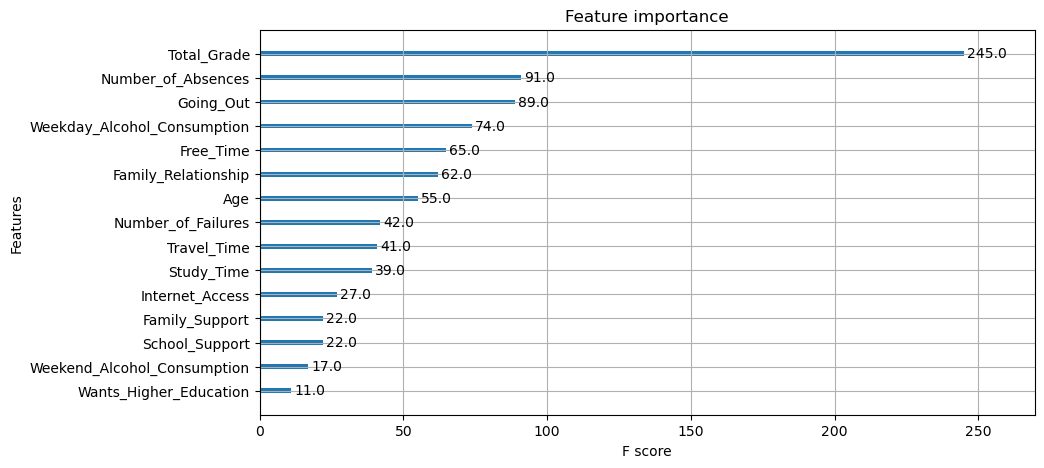

In [31]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(xgb_model, ax=ax)

**로지스틱 회귀 모델

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [33]:
X = data_for_corr.drop(columns = 'Dropped_Out')
y = data_for_corr['Dropped_Out']

In [34]:
smote = SMOTE(random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [35]:
X

,Age,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Wants_Higher_Education,Internet_Access,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Number_of_Absences,Total_Grade
0,18,2,2,0,1,0,0,1,0,4,3,4,1,1,4,22
1,17,1,2,0,0,1,0,1,1,5,3,3,1,1,2,31
2,15,1,2,0,1,0,0,1,1,4,3,2,2,3,6,37
3,15,1,3,0,0,1,0,1,1,3,2,2,1,1,0,42
4,16,1,2,0,0,1,0,1,0,4,3,2,1,2,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,1,3,1,0,0,0,1,1,5,4,2,1,2,4,31
645,18,1,2,0,0,1,0,1,1,4,3,4,1,1,4,46
646,18,2,2,0,0,0,0,1,0,1,1,1,1,1,6,32
647,17,2,1,0,0,0,0,1,1,2,4,5,3,4,6,30


In [36]:
y_train_over.value_counts()

Dropped_Out
0    434
1    434
Name: count, dtype: int64

In [37]:
model = LogisticRegression()

In [38]:
model.fit(X_train_over, y_train_over)

C:\Users\ssowl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       115
           1       0.87      0.87      0.87        15

    accuracy                           0.97       130
   macro avg       0.92      0.92      0.92       130
weighted avg       0.97      0.97      0.97       130



**랜덤포레스트 모델

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [42]:
X = data_for_corr.drop(columns = 'Dropped_Out')
y = data_for_corr['Dropped_Out']

In [43]:
smote = SMOTE(random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [44]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 4)

In [45]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [46]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [47]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       115
           1       0.85      0.73      0.79        15

    accuracy                           0.95       130
   macro avg       0.91      0.86      0.88       130
weighted avg       0.95      0.95      0.95       130



In [48]:
importance = model.feature_importances_
importance

array([0.02121614, 0.0102115 , 0.01908939, 0.12840558, 0.00404674,
       0.0089985 , 0.00333284, 0.06935351, 0.00896684, 0.02043361,
       0.01711319, 0.01544396, 0.01714461, 0.01983285, 0.02276448,
       0.61364627])

([<matplotlib.axis.XTick at 0x289c6f82710>,
 [Text(0, 0, 'Extra_Paid_Class'),
  Text(1, 0, 'School_Support'),
  Text(2, 0, 'Internet_Access'),
  Text(3, 0, 'Family_Support'),
  Text(4, 0, 'Travel_Time'),
  Text(5, 0, 'Going_Out'),
  Text(6, 0, 'Free_Time'),
  Text(7, 0, 'Weekend_Alcohol_Consumption'),
  Text(8, 0, 'Study_Time'),
  Text(9, 0, 'Weekday_Alcohol_Consumption'),
  Text(10, 0, 'Family_Relationship'),
  Text(11, 0, 'Age'),
  Text(12, 0, 'Number_of_Absences'),
  Text(13, 0, 'Wants_Higher_Education'),
  Text(14, 0, 'Number_of_Failures'),
  Text(15, 0, 'Total_Grade')])

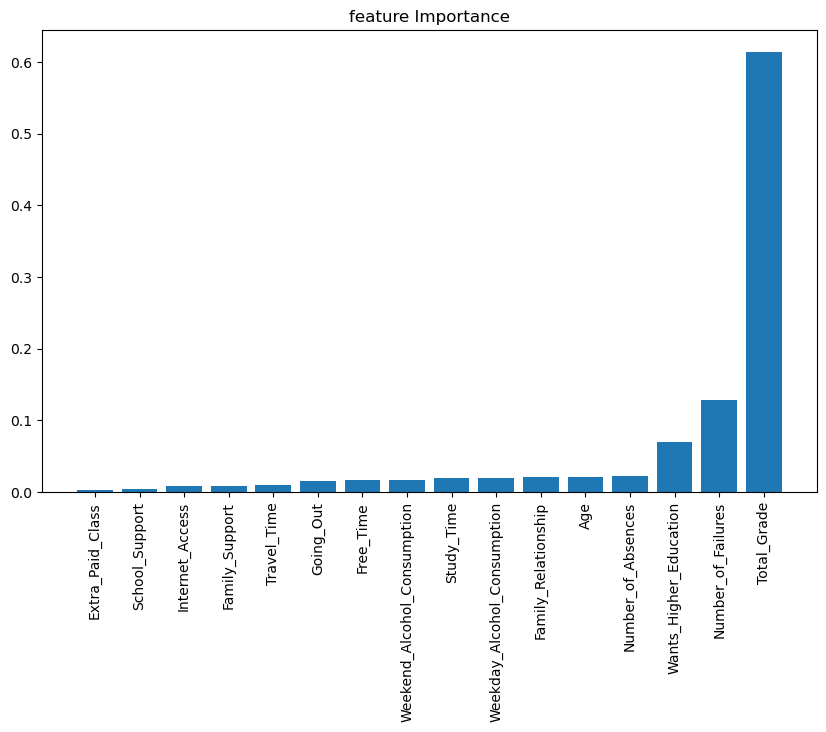

In [49]:
data_sorted = np.argsort(importance) #np.argsort는 데이터의 순서를 잡아줌 

plt.figure(figsize = (10, 6))
plt.title('feature Importance')
plt.bar(range(len(importance)), importance[data_sorted]) #np.argsort를 원래 데이터에 적용하면 크기 순서로 반영
plt.xticks(range(len(importance)), X.columns[data_sorted], rotation = 90) 

**랜덤포레스트 (가중치 부가)

In [50]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 4, class_weight = 'balanced')

In [51]:
X = data_for_corr.drop(columns = 'Dropped_Out')
y = data_for_corr['Dropped_Out']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
X_train.shape

(519, 16)

In [54]:
X_train

,Age,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Wants_Higher_Education,Internet_Access,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Number_of_Absences,Total_Grade
34,16,1,1,0,0,1,0,1,1,5,4,3,1,1,4,36
432,17,1,1,1,0,1,0,0,1,5,4,4,2,2,0,19
399,18,1,3,0,0,0,0,1,1,5,4,3,2,3,4,47
346,17,2,1,0,0,0,0,1,1,4,1,1,2,2,0,38
542,16,2,3,0,0,1,0,1,1,5,3,5,1,4,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,15,1,2,0,0,1,0,1,1,5,5,1,1,1,0,37
359,17,1,3,0,0,1,0,1,1,4,3,4,2,5,2,47
192,16,1,1,0,0,1,0,1,1,4,3,3,3,4,8,30
629,17,1,1,0,0,0,0,1,1,3,5,5,1,3,4,24


In [55]:
X_test.shape

(130, 16)

In [56]:
y_train

34     0
432    1
399    0
346    0
542    0
      ..
9      0
359    0
192    0
629    1
559    0
Name: Dropped_Out, Length: 519, dtype: int64

In [57]:
y_test

532    1
375    0
306    0
625    0
480    0
      ..
403    0
266    0
641    0
558    0
242    0
Name: Dropped_Out, Length: 130, dtype: int64

In [58]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4)

In [59]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [60]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       115
           1       0.67      0.93      0.78        15

    accuracy                           0.94       130
   macro avg       0.83      0.94      0.87       130
weighted avg       0.95      0.94      0.94       130



In [61]:
importance = model.feature_importances_
importance

array([0.02142586, 0.01140287, 0.01753792, 0.13613749, 0.00455509,
       0.00300334, 0.00278432, 0.04714005, 0.01026076, 0.01787157,
       0.02185583, 0.02674675, 0.02193165, 0.01627672, 0.02173156,
       0.61933824])

([<matplotlib.axis.XTick at 0x289c7184490>,
 [Text(0, 0, 'Extra_Paid_Class'),
  Text(1, 0, 'Family_Support'),
  Text(2, 0, 'School_Support'),
  Text(3, 0, 'Internet_Access'),
  Text(4, 0, 'Travel_Time'),
  Text(5, 0, 'Weekday_Alcohol_Consumption'),
  Text(6, 0, 'Study_Time'),
  Text(7, 0, 'Family_Relationship'),
  Text(8, 0, 'Age'),
  Text(9, 0, 'Number_of_Absences'),
  Text(10, 0, 'Free_Time'),
  Text(11, 0, 'Weekend_Alcohol_Consumption'),
  Text(12, 0, 'Going_Out'),
  Text(13, 0, 'Wants_Higher_Education'),
  Text(14, 0, 'Number_of_Failures'),
  Text(15, 0, 'Total_Grade')])

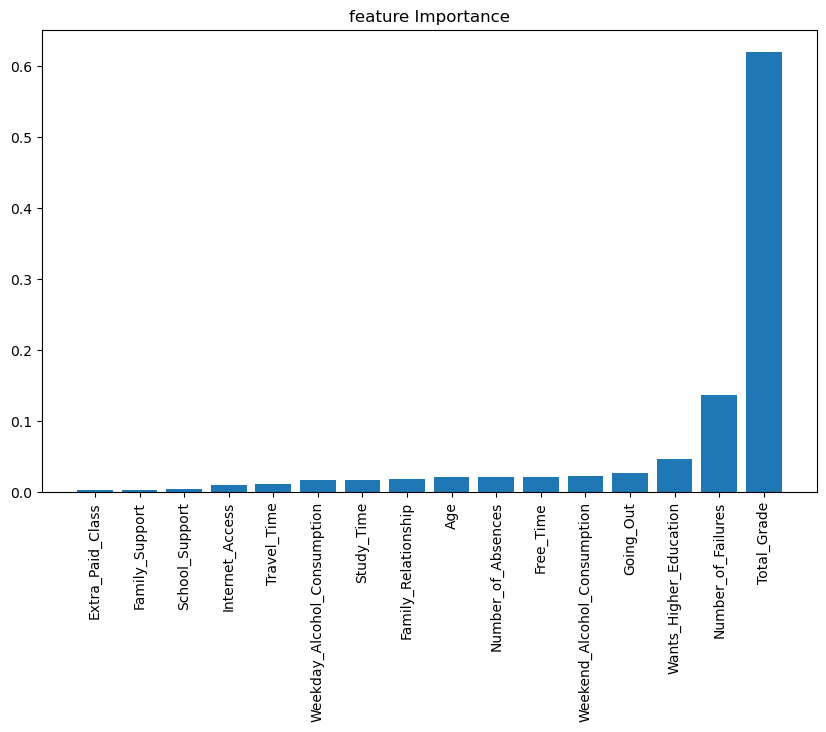

In [62]:
data_sorted = np.argsort(importance) #np.argsort는 데이터의 순서를 잡아줌 

plt.figure(figsize = (10, 6))
plt.title('feature Importance')
plt.bar(range(len(importance)), importance[data_sorted]) #np.argsort를 원래 데이터에 적용하면 크기 순서로 반영
plt.xticks(range(len(importance)), X.columns[data_sorted], rotation = 90) 